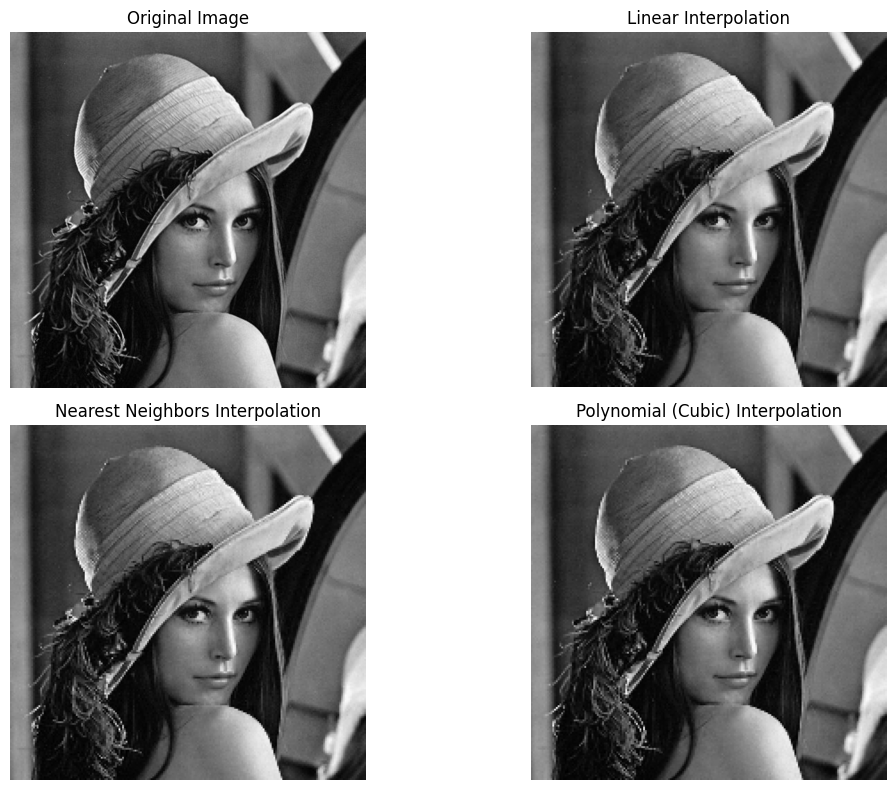

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = "chic.jpg"
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

target_size = (200, 200)

resized_linear = cv2.resize(original_image, target_size, interpolation=cv2.INTER_LINEAR)

resized_nearest = cv2.resize(original_image, target_size, interpolation=cv2.INTER_NEAREST)

resized_cubic = cv2.resize(original_image, target_size, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(resized_linear)
plt.title("Linear Interpolation")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(resized_nearest)
plt.title("Nearest Neighbors Interpolation")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(resized_cubic)
plt.title("Polynomial (Cubic) Interpolation")
plt.axis("off")

plt.tight_layout()
plt.show()


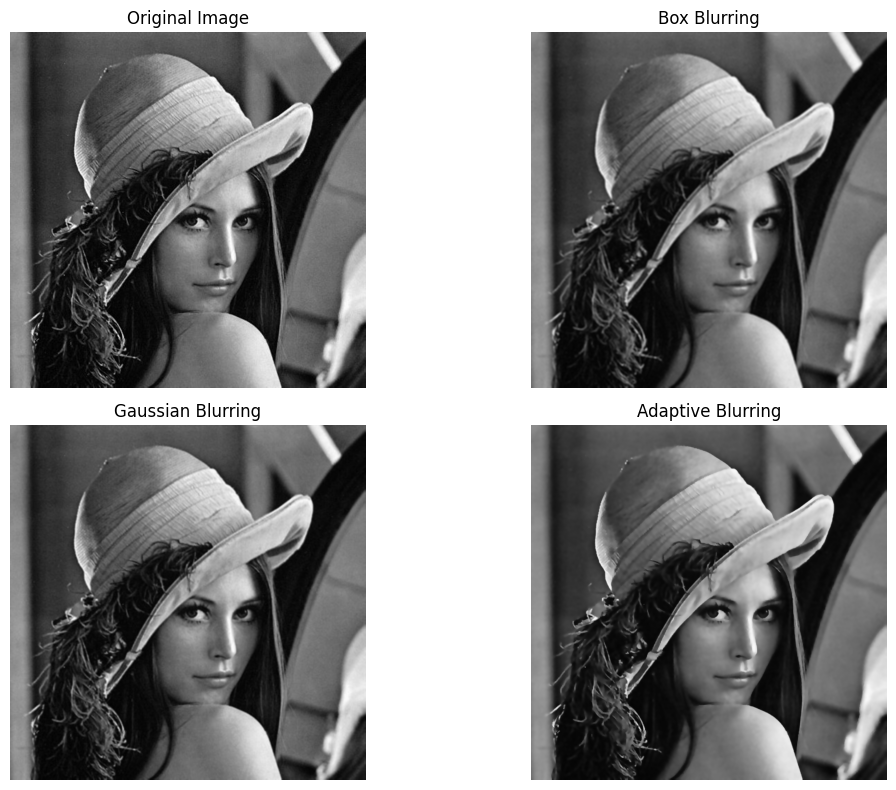

In [ ]:
box_blur = cv2.blur(original_image, (5, 5))

gaussian_blur = cv2.GaussianBlur(original_image, (5, 5), 0)

# 1.2.3 Adaptive Blurring
adaptive_blur = cv2.bilateralFilter(original_image, 9, 75, 75)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(box_blur)
plt.title("Box Blurring")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(gaussian_blur)
plt.title("Gaussian Blurring")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(adaptive_blur)
plt.title("Adaptive Blurring")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and labels
X = mnist.data
y = mnist.target

# Convert labels to integers
y = y.astype(int)

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (56000, 784), Testing data shape: (14000, 784)


In [ ]:
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

print("\n--- Naive Bayes ---")
nb_model = GaussianNB()

nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=kfold, scoring="accuracy")
print(f"K-Fold Cross-Validation Accuracy (Naive Bayes): {nb_cv_scores.mean():.4f}")

nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
nb_test_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Test Accuracy (Naive Bayes): {nb_test_accuracy:.4f}")

print("\n--- Support Vector Machine (SVM) ---")
svm_model = SVC(kernel='rbf', random_state=42)

svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=kfold, scoring="accuracy")
print(f"K-Fold Cross-Validation Accuracy (SVM): {svm_cv_scores.mean():.4f}")

svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Test Accuracy (SVM): {svm_test_accuracy:.4f}")


--- Naive Bayes ---
K-Fold Cross-Validation Accuracy (Naive Bayes): 0.5508
Test Accuracy (Naive Bayes): 0.5516

--- Support Vector Machine (SVM) ---
K-Fold Cross-Validation Accuracy (SVM): 0.9771
Test Accuracy (SVM): 0.9764
